<a href="https://colab.research.google.com/github/DDxk/MyKaggle/blob/master/%E5%B7%A5%E4%B8%9A%E8%92%B8%E6%B1%BD%E9%87%8F%E9%A2%84%E6%B5%8B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 工业蒸汽量预测建模开源分享

In [0]:

#数据读取
import pandas as pd
import numpy as np

train=pd.read_csv('/content/zhengqi_train.txt',sep='\t')
test=pd.read_csv('/content/zhengqi_test.txt',sep='\t')
train_x=train.drop(['target'],axis=1)
all_data = pd.concat([train_x,test]) 

# 数据分析与数据处理

In [0]:
train = pd.read_table('/content/zhengqi_train.txt')
train.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [0]:
test = pd.read_table('/content/zhengqi_test.txt')
test.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [0]:
train.info()

In [0]:
test.info()

In [0]:
train.describe()

In [0]:
test.describe()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


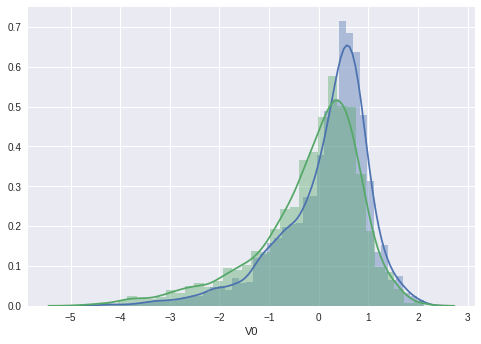

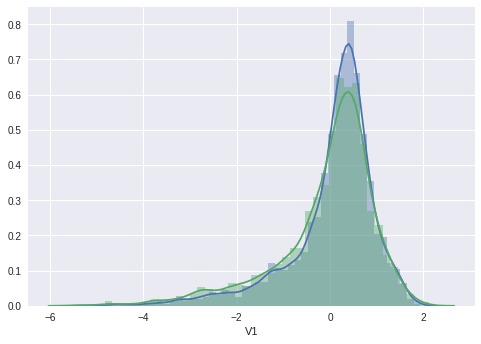

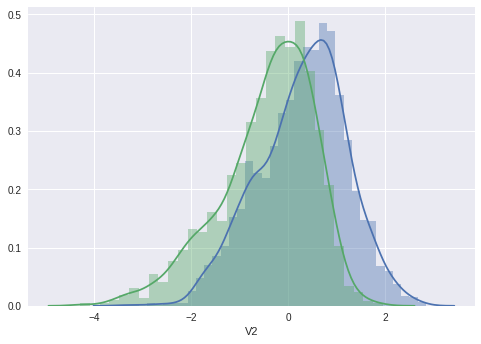

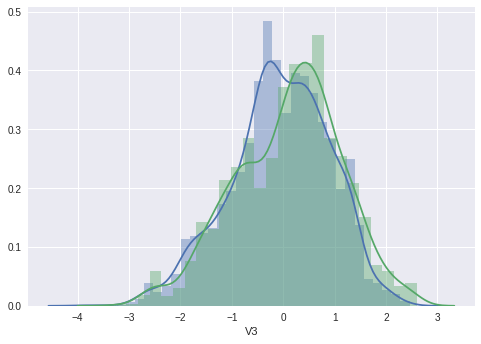

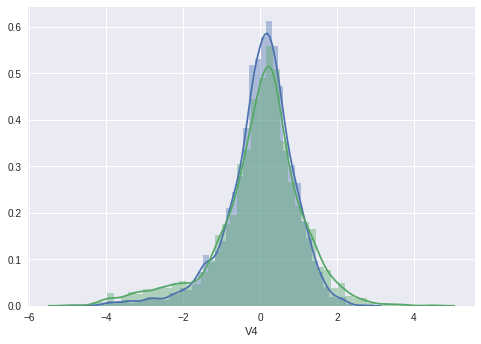

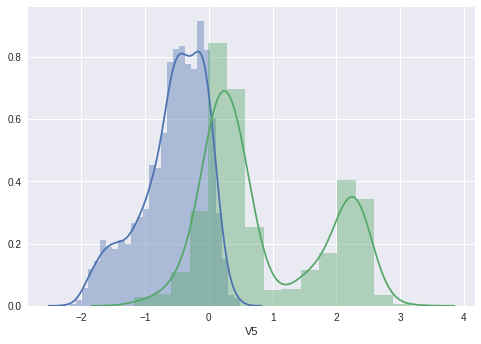

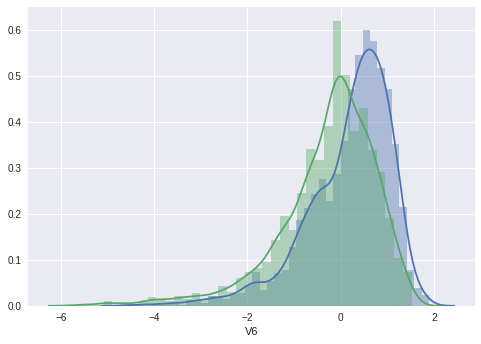

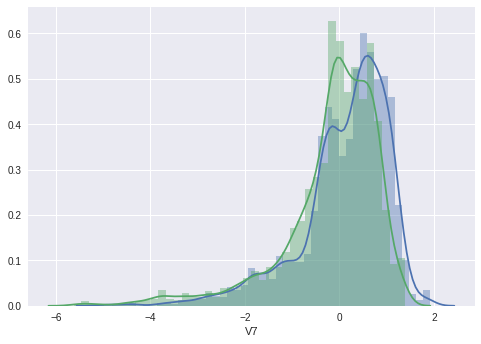

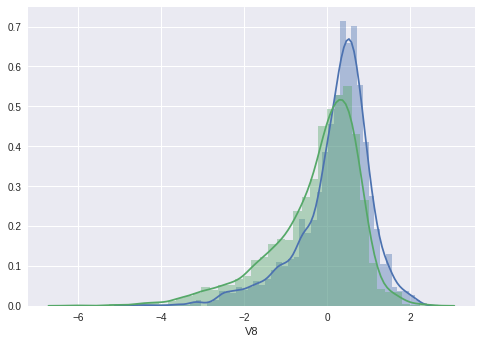

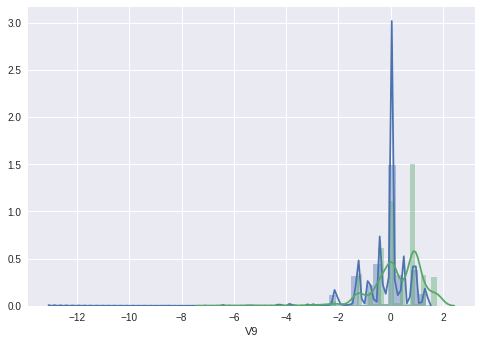

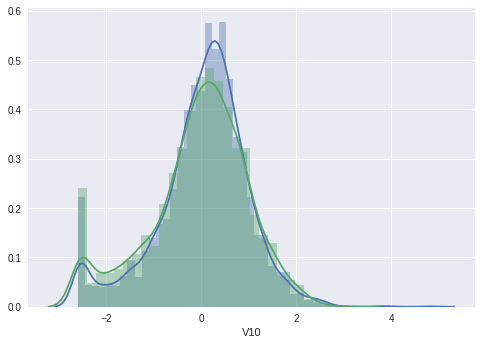

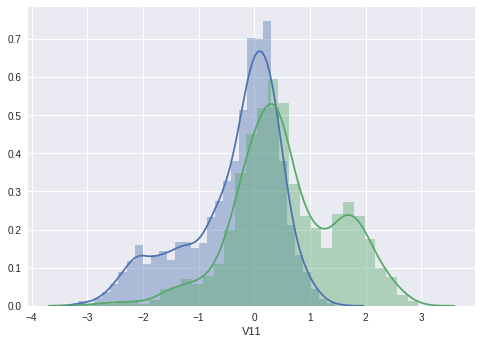

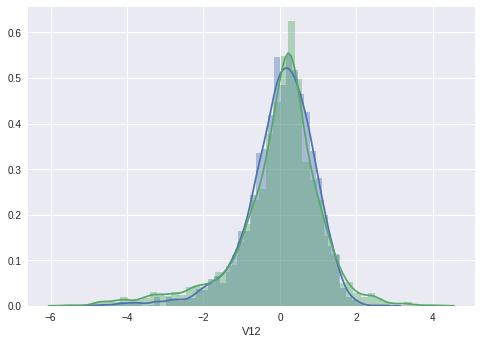

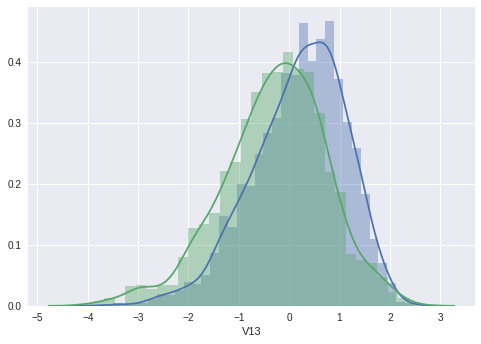

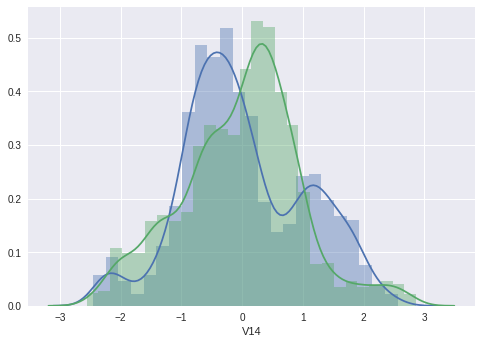

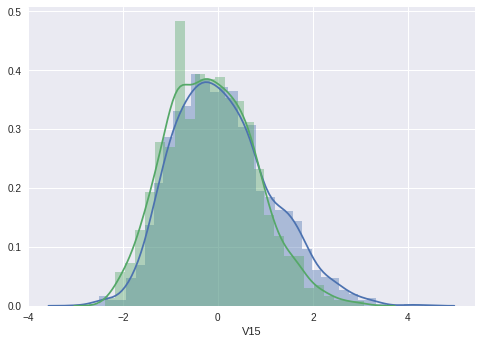

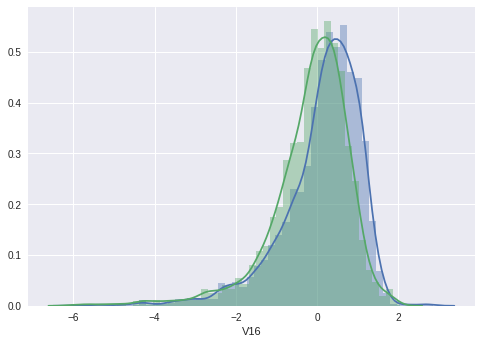

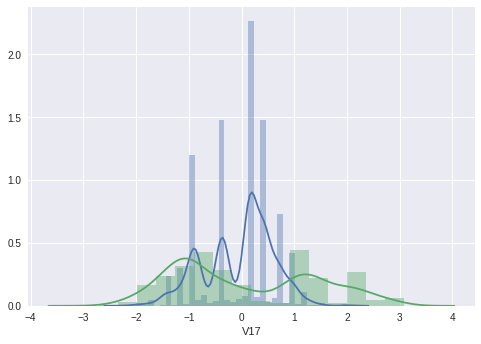

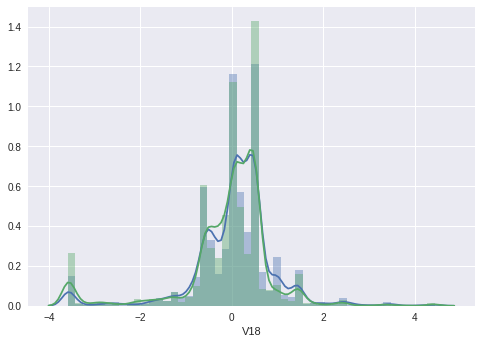

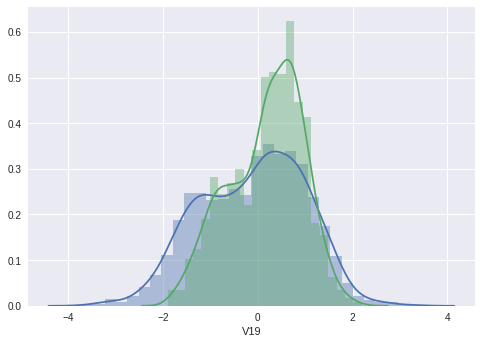

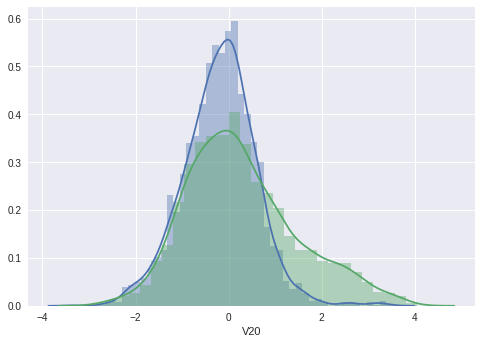

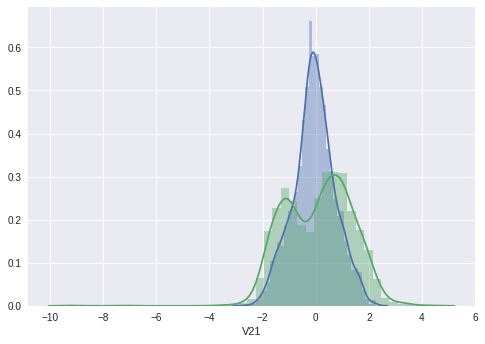

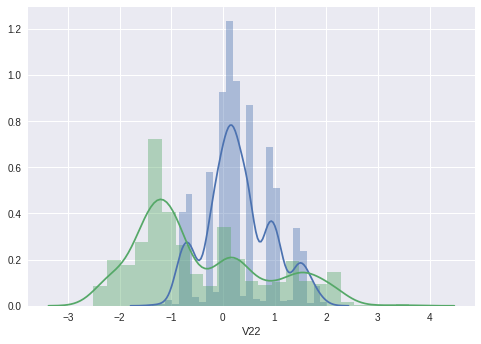

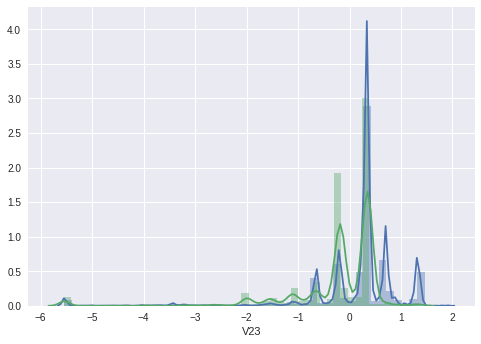

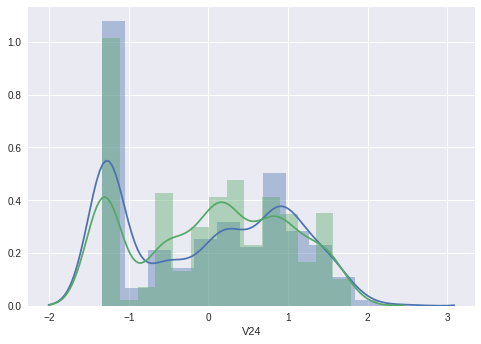

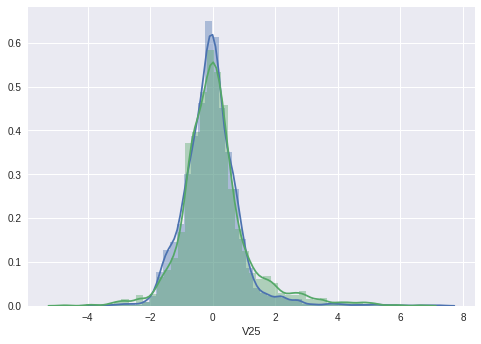

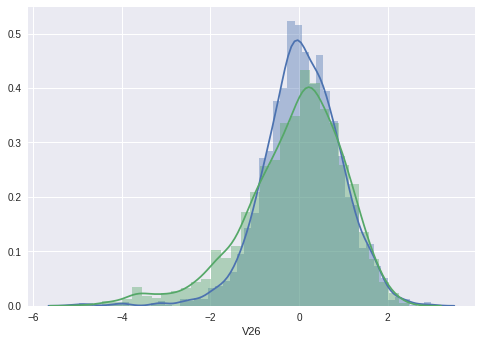

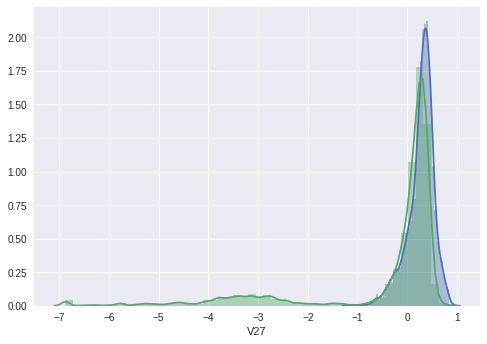

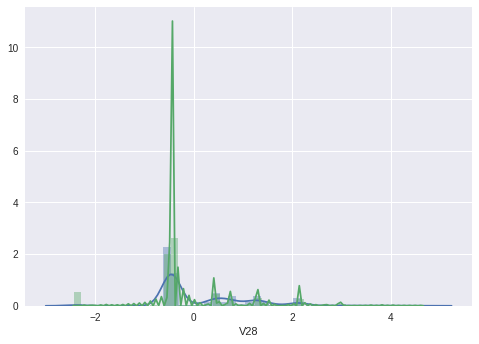

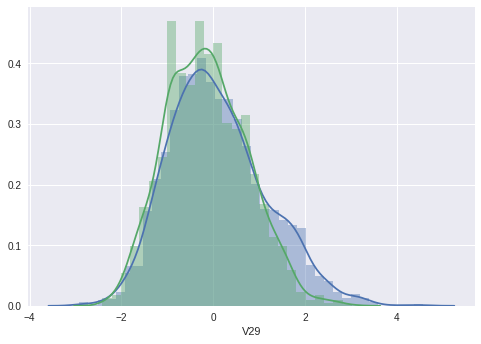

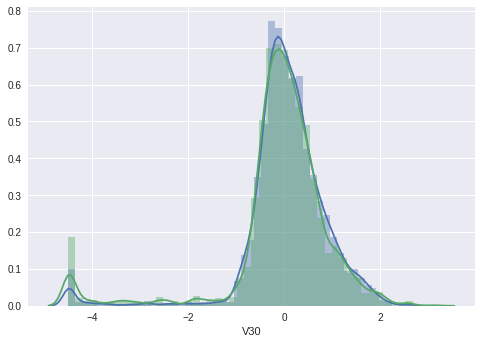

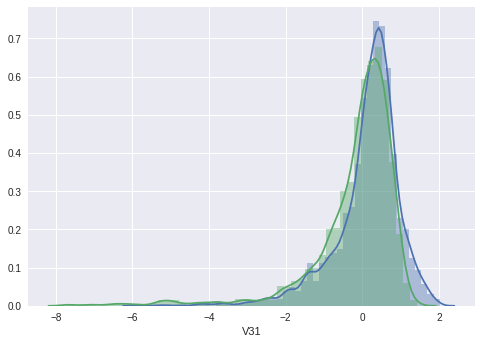

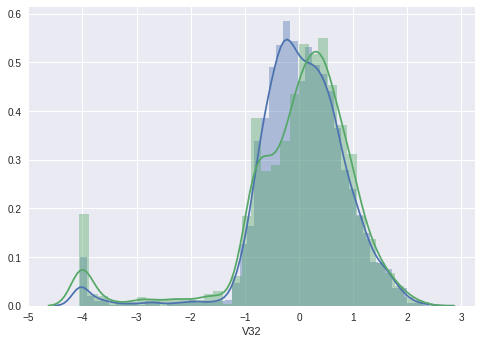

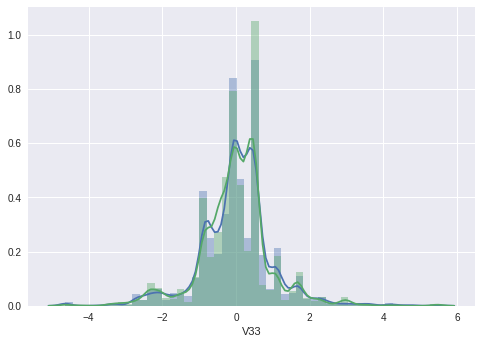

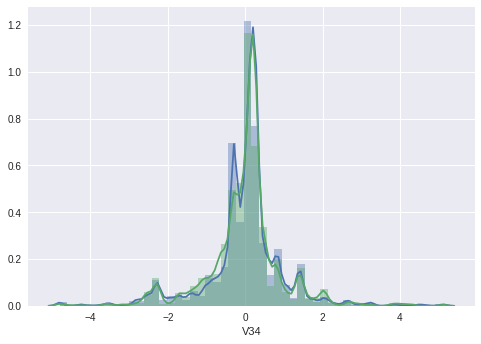

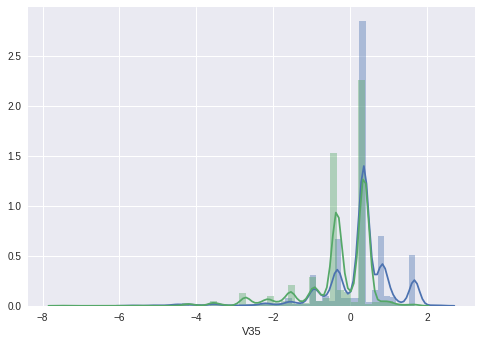

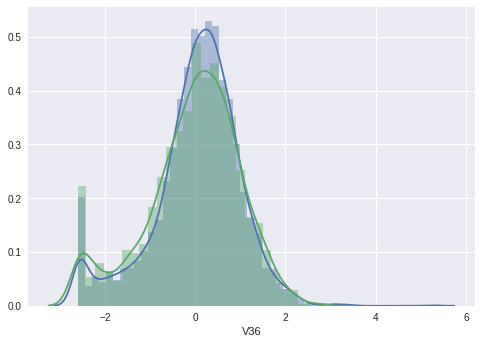

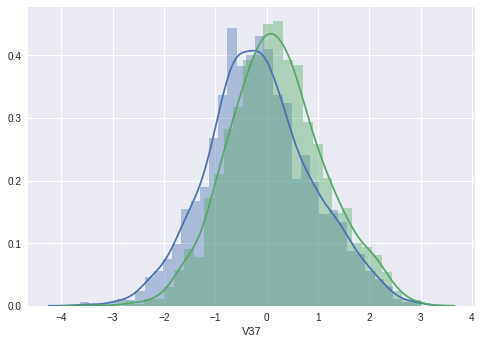

In [0]:
#数据观察（可视化）
import seaborn
import matplotlib.pyplot as plt  

for col in all_data.columns:
    seaborn.distplot(train[col])
    seaborn.distplot(test[col])
    plt.show()

有上面的数据分布来看，特征'V5', 'V17', 'V28', 'V22', 'V11', 'V9' 训练集数据与测试集数据分布不一致，会导致模型泛化能力差，采用删除此类特征方法。

# 删除无效特征，并做数据标准化

In [0]:
all_data.drop(['V5','V17','V28','V22','V11','V9'],axis=1,inplace=True)

#数据标准化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = pd.DataFrame(min_max_scaler.fit_transform(all_data),columns=all_data.columns)

In [0]:
# =============================================================================
#数据观察（可视化）
# import seaborn
# import matplotlib.pyplot as plt  
#
# for col in data_minmax.columns:
#     seaborn.distplot(data_minmax[col])
#     seaborn.distplot(train[col])
#     seaborn.distplot(test[col])
#     plt.show()
# =============================================================================

针对特征['V0','V1','V6','V30']做数据变换，使得数据符合正态分布

In [0]:
import math

data_minmax['V0'] = data_minmax['V0'].apply(lambda x:math.exp(x))
data_minmax['V1'] = data_minmax['V1'].apply(lambda x:math.exp(x))
data_minmax['V6'] = data_minmax['V6'].apply(lambda x:math.exp(x))
data_minmax['V30'] = np.log1p(data_minmax['V30'])
#train['exp'] = train['target'].apply(lambda x:math.pow(1.5,x)+10)

X_scaled = pd.DataFrame(preprocessing.scale(data_minmax),columns = data_minmax.columns)
train_x = X_scaled.ix[0:len(train)-1]
test = X_scaled.ix[len(train):]

Y=train['target']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


# 特征选择

通过方差阈值来筛选特征，采用<font color=blue>threshold=0.85</font>，剔除掉方差较小，即变化较小的特征删除，因为预测意义小；

大多数数据已经被标准化到【0，1】之间，<font color=brow>通过分析，方差的值域控制为 0.85*（1-0.85）之间有利于特征选择，太大容易删除过多的特征，太小容易保留无效的特征，对预测造成干扰。</font>

In [0]:
#特征选择
from sklearn.feature_selection import VarianceThreshold   #方差选择法
from sklearn.feature_selection import SelectKBest         #自定义特征评分选择法
from sklearn.feature_selection import f_regression       #


#方差
threshold = 0.85                  
vt = VarianceThreshold().fit(train_x)
# Find feature names
feat_var_threshold = train_x.columns[vt.variances_ > threshold * (1-threshold)]
train_x = train_x[feat_var_threshold]
test = test[feat_var_threshold]


# 单变量选择

In [0]:
#单变量
X_scored = SelectKBest(score_func=f_regression, k='all').fit(train_x, Y)
feature_scoring = pd.DataFrame({
        'feature': train_x.columns,
        'score': X_scored.scores_
    })
head_feature_num = 18
feat_scored_headnum = feature_scoring.sort_values('score', ascending=False).head(head_feature_num)['feature']
train_x_head = train_x[train_x.columns[train_x.columns.isin(feat_scored_headnum)]]
X_scaled = pd.DataFrame(preprocessing.scale(train_x),columns = train_x.columns)

In [0]:
# =============================================================================
# 
# from sklearn.decomposition import PCA, KernelPCA
# components = 8
# pca = PCA(n_components=components).fit(train_x)
# pca_variance_explained_df = pd.DataFrame({
#      "component": np.arange(1, components+1),
#      "variance_explained": pca.explained_variance_ratio_            
#     })
# 
# cols = train_x.columns
# train_x = pca.transform(train_x)
# test = pca.transform(test[cols])
# 
# =============================================================================



# 模型选择

**尝试各种模型，针对该数据的表现**

In [0]:
#模型尝试
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor   #随机森林,     集成回归方法
from sklearn.kernel_ridge import KernelRidge  #内核岭回归
from sklearn.pipeline import make_pipeline    #管道
from sklearn.preprocessing import RobustScaler  #正则化
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb

n_folds = 10

def rmsle_cv(model,train_x_head=train_x_head):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_x_head)
    rmse= -cross_val_score(model, train_x_head, Y, scoring="neg_mean_squared_error", cv = kf)
    return(rmse)
    
svr = make_pipeline( SVR(kernel='linear'))
 
line = make_pipeline( LinearRegression())
lasso = make_pipeline( Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline( ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR1 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR2 = KernelRidge(alpha=1.5, kernel='linear', degree=2, coef0=2.5)
#KRR3 = KernelRidge(alpha=0.6, kernel='rbf', degree=2, coef0=2.5)
# =============================================================================
# GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.02,
#                                    max_depth=5, max_features=7,
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
# =============================================================================

model_xgb = xgb.XGBRegressor(booster='gbtree',colsample_bytree=0.8, gamma=0.1, 
                             learning_rate=0.02, max_depth=5, 
                             n_estimators=500,min_child_weight=0.8,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.8, silent=1,
                             random_state =42, nthread = 2)


# =============================================================================
# cv_params = {'min_child_weight': [0.05,0.1,0.15,0.2,0.25],
#              'learning_rate': [0.01, 0.02, 0.05, 0.1],
#              'max_depth': [3,5,7,9]}
# 
# other_params = {'learning_rate': 0.02, 'n_estimators': 400, 'max_depth': 5, 'min_child_weight': 0.8, 'seed': 0,
#                 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.5, 'reg_alpha': 0, 'reg_lambda': 1}
# 
# model = xgb.XGBRegressor(**other_params)
# optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
# optimized_GBM.fit(train_x, Y)
# evalute_result = optimized_GBM.grid_scores_
# print('每轮迭代运行结果:{0}'.format(evalute_result))
# print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
# print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))
# model_xgb = xgb.XGBRegressor(optimized_GBM.best_params_)
# =============================================================================
# =============================================================================
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
# =============================================================================


# =============================================================================
# parameters = { 
#             'n_estimators':[300,600,900,1500,2500],
#             #'boosting':'dart',
#             'max_bin':[55,75,95],
#             'num_iterations':[50,100,250,400],
#              # 'max_features':[7,9,11,13],
#               'min_samples_leaf': [15, 25, 35, 45],
#               'learning_rate': [0.01, 0.03, 0.05, 0.1],
#               'num_leaves':[15,31,63],
#             
#               'lambda_l2':[0,1]}  # 定义要优化的参数信息
# clf = GridSearchCV( model_lgb, parameters, n_jobs=3,scoring = 'neg_mean_squared_error' )
# clf.fit(train_x,Y)
# =============================================================================


#print('best n_estimators:', clf.best_params_)
#print('best cv score:', clf.score_)


score = rmsle_cv(svr)
print("\nSVR 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
svr.fit(train_x_head,Y)
score = rmsle_cv(line)
print("\nLine 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(lasso)
print("\nLasso 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR2)
print("Kernel Ridge2 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
KRR2.fit(train_x_head,Y)
#score = rmsle_cv(KRR3)
#print("Kernel Ridge3 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# =============================================================================
head_feature_num = 18
feat_scored_headnum = feature_scoring.sort_values('score', ascending=False).head(head_feature_num)['feature']
train_x_head2 = train_x[train_x.columns[train_x.columns.isin(feat_scored_headnum)]]
X_scaled = pd.DataFrame(preprocessing.scale(train_x),columns = train_x.columns)
score = rmsle_cv(KRR1,train_x_head2)
print("Kernel Ridge1 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# score = rmsle_cv(GBoost)
# print("Gradient Boosting 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
# =============================================================================
head_feature_num = 22
feat_scored_headnum = feature_scoring.sort_values('score', ascending=False).head(head_feature_num)['feature']
train_x_head3 = train_x[train_x.columns[train_x.columns.isin(feat_scored_headnum)]]
X_scaled = pd.DataFrame(preprocessing.scale(train_x),columns = train_x.columns)
score = rmsle_cv(model_xgb,train_x_head3)
print("Xgboost 得分: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
model_xgb.fit(train_x_head,Y)
# =============================================================================
# score = rmsle_cv(model_lgb)
# print("LGBM 得分: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
# =============================================================================



SVR 得分: 0.1276 (0.0555)


Line 得分: 0.1290 (0.0544)


Lasso 得分: 0.1290 (0.0543)

ElasticNet 得分: 0.1290 (0.0543)

Kernel Ridge2 得分: 0.1269 (0.0531)

Kernel Ridge1 得分: 0.1306 (0.0565)



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/x

Xgboost 得分: 0.1311 (0.0566)



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.1, importance_type='gain',
       learning_rate=0.02, max_delta_step=0, max_depth=5,
       min_child_weight=0.8, missing=None, n_estimators=500, n_jobs=1,
       nthread=2, objective='reg:linear', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8)

# 简单模型融合

In [0]:
#简单模型融合
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 遍历所有模型，你和数据
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # 预估，并对预估结果值做average
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        #return 0.85*predictions[:,0]+0.15*predictions[:,1]
        #return 0.7*predictions[:,0]+0.15*predictions[:,1]+0.15*predictions[:,2]
        return np.mean(predictions, axis=1)   
#averaged_models = AveragingModels(models = (lasso,KRR))    
averaged_models = AveragingModels(models = (svr,KRR2,model_xgb))

# 后续优化空间
**异常值剔除**

**目标值处理**

**特征选择（逐步回归，嵌入式）**

**Stacking**